#### Factorial Experiments:

In [237]:
import itertools
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from sympy import Matrix

**Factorial deisgn:**
- **WinghLenght:** 6.5cm : -1 , 9.5cm : +1 ----> a
- **BodyLenght:** 6.5cm : -1 , 9.5cm : +1 ----> b
- **BodyWidth:** 4cm : -1 , 6cm : +1 ----> c
- **PaperClip:** n : -1 , y : +1  ----> d
- **Tape:** n : -1 , y : +1 ----> e


In [238]:
# Declaring Factors

factors = {
    "a": [-1,1],
    "b": [-1,1],
    "c": [-1,1],
    "d": [-1,1],
    "e": [-1,1]
}

#### Full Factorial

In [239]:
# Compute full factors and generate all possible combinations (interactions)

factor_level = list(itertools.product(*factors.values()))
#factor_level

In [240]:
# Insert to DataFrane 
df = pd.DataFrame(factor_level, columns=factors.keys())

# Show partial data and the shape
print("Shape:",df.shape)
df.head()

Shape: (32, 5)


,a,b,c,d,e
0,-1,-1,-1,-1,-1
1,-1,-1,-1,-1,1
2,-1,-1,-1,1,-1
3,-1,-1,-1,1,1
4,-1,-1,1,-1,-1


In [241]:
# Insert Intercept
df.insert(0, "Intercept", 1)
df.head()

,Intercept,a,b,c,d,e
0,1,-1,-1,-1,-1,-1
1,1,-1,-1,-1,-1,1
2,1,-1,-1,-1,1,-1
3,1,-1,-1,-1,1,1
4,1,-1,-1,1,-1,-1


In [242]:
# Generate Intereactions 

# Loop through interaction levels
for i in range(1, len(factors)+1):

    # Generate all combos for i factors
    for interactions in itertools.combinations(factors.keys(), i):
        col_name = ':'.join(interactions) # Column name representing interactions 
        df[col_name] = df[(list(interactions))].prod(axis=1) # Multiply the columns to get the interactions


In [243]:
print("Number of Columns:",len(df.columns))
print("Column Names",df.columns)
df.head()

Number of Columns: 32
Column Names Index(['Intercept', 'a', 'b', 'c', 'd', 'e', 'a:b', 'a:c', 'a:d', 'a:e', 'b:c',
       'b:d', 'b:e', 'c:d', 'c:e', 'd:e', 'a:b:c', 'a:b:d', 'a:b:e', 'a:c:d',
       'a:c:e', 'a:d:e', 'b:c:d', 'b:c:e', 'b:d:e', 'c:d:e', 'a:b:c:d',
       'a:b:c:e', 'a:b:d:e', 'a:c:d:e', 'b:c:d:e', 'a:b:c:d:e'],
      dtype='object')


,Intercept,a,b,c,d,e,a:b,a:c,a:d,a:e,...,b:c:d,b:c:e,b:d:e,c:d:e,a:b:c:d,a:b:c:e,a:b:d:e,a:c:d:e,b:c:d:e,a:b:c:d:e
0,1,-1,-1,-1,-1,-1,1,1,1,1,...,-1,-1,-1,-1,1,1,1,1,1,-1
1,1,-1,-1,-1,-1,1,1,1,1,-1,...,-1,1,1,1,1,-1,-1,-1,-1,1
2,1,-1,-1,-1,1,-1,1,1,-1,1,...,1,-1,1,1,-1,1,-1,-1,-1,1
3,1,-1,-1,-1,1,1,1,1,-1,-1,...,1,1,-1,-1,-1,-1,1,1,1,-1
4,1,-1,-1,1,-1,-1,1,-1,1,1,...,1,1,-1,1,-1,-1,1,-1,-1,1


#### Reduced Echelon Form RREF

In [244]:
m1 = Matrix(df.values)

rref , pivots = m1.rref()
print("RREF")
print(rref)
print(f"Rank: {len(pivots)}")

RREF
Matrix([[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 

In [245]:
m_df2 = np.matrix(rref)
df2 = pd.DataFrame(m_df2)
print("Number of Columns", len(df2.columns))
print(f"Rank: {len(pivots)}")
df2

Number of Columns 32
Rank: 32


,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


**Full Rank** All rows and columns are LI

In [246]:
corr_matrix = df.corr()

# Diplay all available numbers 
#print(corr_matrix)


In [247]:
# Round for better readability. 
print(round(corr_matrix, 2))

           Intercept    a    b    c    d    e  a:b  a:c  a:d  a:e  ...  b:c:d  \
Intercept        NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...    NaN   
a                NaN  1.0 -0.0  0.0  0.0  0.0  0.0  0.0 -0.0 -0.0  ...    0.0   
b                NaN -0.0  1.0  0.0  0.0  0.0  0.0  0.0 -0.0 -0.0  ...   -0.0   
c                NaN  0.0  0.0  1.0 -0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0   
d                NaN  0.0  0.0 -0.0  1.0  0.0 -0.0  0.0  0.0  0.0  ...    0.0   
e                NaN  0.0  0.0  0.0  0.0  1.0  0.0  0.0 -0.0  0.0  ...   -0.0   
a:b              NaN  0.0  0.0  0.0 -0.0  0.0  1.0 -0.0 -0.0 -0.0  ...    0.0   
a:c              NaN  0.0  0.0  0.0  0.0  0.0 -0.0  1.0 -0.0  0.0  ...    0.0   
a:d              NaN -0.0 -0.0  0.0  0.0 -0.0 -0.0 -0.0  1.0 -0.0  ...   -0.0   
a:e              NaN -0.0 -0.0  0.0  0.0  0.0 -0.0  0.0 -0.0  1.0  ...    0.0   
b:c              NaN  0.0 -0.0  0.0  0.0 -0.0  0.0 -0.0  0.0 -0.0  ...   -0.0   
b:d              NaN  0.0  0

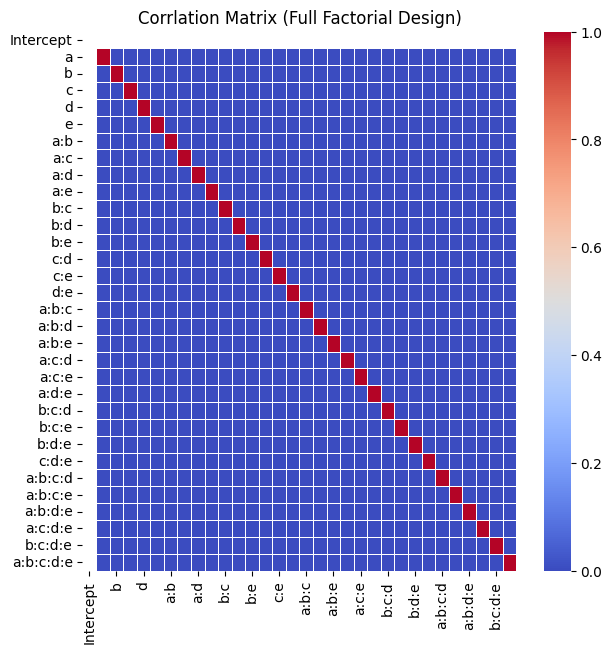

In [248]:
plt.figure(figsize=(7,7))
sns.heatmap(corr_matrix, annot=False, cmap="coolwarm",  linewidths=0.5)
plt.title("Corrlation Matrix (Full Factorial Design)")
plt.show()


#### Filter Partial Factorial Design 

- Choose 2 most interesting value and keep the least 3 interesting constant. 
- Interesting: **Clip(d)** and **Tape(e)** | Least interesting: Wing and body lenght, body width. 

In [249]:
filt_factors = {
   
    "d": [-1,1],
    "e": [-1,1]
}

constan_val = {
    "a": 1,
    "b": 1,
    "c": -1
}

In [250]:
filt_factors_lvl = list(itertools.product(*filt_factors.values()))

df3 = pd.DataFrame(filt_factors_lvl, columns= filt_factors.keys())
df3 = df3.assign(**constan_val)
df3
df3

,d,e,a,b,c
0,-1,-1,1,1,-1
1,-1,1,1,1,-1
2,1,-1,1,1,-1
3,1,1,1,1,-1


In [251]:
# Re arranging the Dataframe for better readability

df3.insert(0, "Intercept", 1)
df3 = df3[["Intercept"]+ list(constan_val.keys()) + list(filt_factors.keys())]
df3

,Intercept,a,b,c,d,e
0,1,1,1,-1,-1,-1
1,1,1,1,-1,-1,1
2,1,1,1,-1,1,-1
3,1,1,1,-1,1,1


In [252]:
# Compute interactions from filtered 
for i in range(1, len(filt_factors) + 1):  
    for interaction in itertools.combinations(filt_factors.keys(), i):  
        col_name = ':'.join(interaction)  
        df3[col_name] = df3[list(interaction)].prod(axis=1)  
df3

,Intercept,a,b,c,d,e,d:e
0,1,1,1,-1,-1,-1,1
1,1,1,1,-1,-1,1,-1
2,1,1,1,-1,1,-1,-1
3,1,1,1,-1,1,1,1


In [253]:
m2 = Matrix(df3.values)
rref_2 , pivots_2 = m2.rref()
print("RREF")
print(rref_2)
print(f"Rank: {len(pivots_2)}")

RREF
Matrix([[1, 1, 1, -1, 0, 0, 0], [0, 0, 0, 0, 1, 0, 0], [0, 0, 0, 0, 0, 1, 0], [0, 0, 0, 0, 0, 0, 1]])
Rank: 4


In [254]:
m_df3 = np.matrix(rref_2)
df4 = pd.DataFrame(m_df3)
df4

,0,1,2,3,4,5,6
0,1,1,1,-1,0,0,0
1,0,0,0,0,1,0,0
2,0,0,0,0,0,1,0
3,0,0,0,0,0,0,1


**Not Full Rank:** matrix has 7 columns but only 4 independent variables. 

In [255]:
corr_matrix_2 = df3.corr()
print(corr_matrix_2)

           Intercept   a   b   c    d    e  d:e
Intercept        NaN NaN NaN NaN  NaN  NaN  NaN
a                NaN NaN NaN NaN  NaN  NaN  NaN
b                NaN NaN NaN NaN  NaN  NaN  NaN
c                NaN NaN NaN NaN  NaN  NaN  NaN
d                NaN NaN NaN NaN  1.0  0.0  0.0
e                NaN NaN NaN NaN  0.0  1.0  0.0
d:e              NaN NaN NaN NaN  0.0  0.0  1.0


**Comment:** Part of the correlation are NaN which means there is not valid correlation in these values, the rest means there is no correlation besides the same variable just like the example of full factorial.

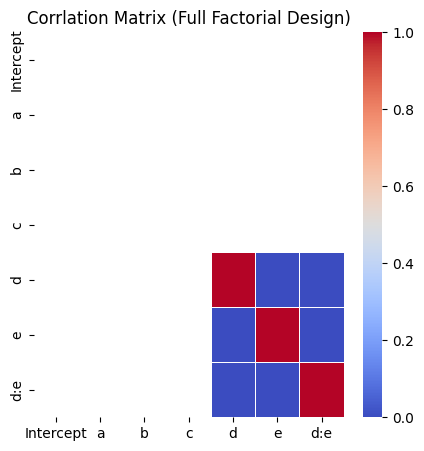

In [256]:
plt.figure(figsize=(5,5))
sns.heatmap(corr_matrix_2, annot=False, cmap="coolwarm",  linewidths=0.5)
plt.title("Corrlation Matrix (Full Factorial Design)")
plt.show()

#### Linear Regression:
